In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

from ipywidgets import interact
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

import postlearn as pl

In [3]:
df = sns.load_dataset('titanic')

In [4]:
clf = RandomForestClassifier()
param_grid = dict(max_depth=[1, 2, 5, 10, 20, 30, 40],
                  min_samples_split=[2, 5, 10],
                  min_samples_leaf=[2, 3, 5])
est = GridSearchCV(clf, param_grid=param_grid, n_jobs=4)

y = df['survived']
X = df.drop(['survived', 'who', 'alive'], axis=1)

X = pd.get_dummies(X, drop_first=True)
X = X.fillna(value=X.median())
est.fit(X, y);

In [5]:
r = pl.ClassificationResults(est, X, y)

# Useful Attributes

Easy acccess to commonly needed attributes.

In [6]:
r.labels

[0, 1]

In [7]:
r.X_train.head()

,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton
0,3,22.0,1,0,7.2500,True,False,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,False,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,26.0,0,0,7.9250,False,True,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,False,False,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,35.0,0,0,8.0500,True,True,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Items that must be computed, like the predicted `y`s are cached.

In [8]:
r.y_pred_train[:10]

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1])

In [9]:
r.confusion_matrix()

predicted,0,1
actual,,
0,522,27
1,81,261


# Grid Search Results

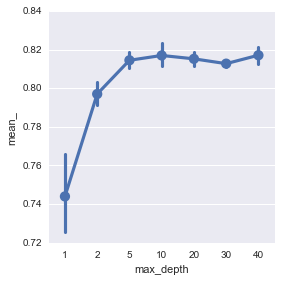

In [10]:
r.plot_grid_scores('max_depth');

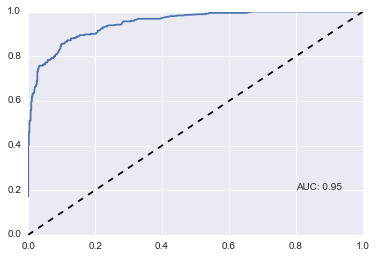

In [11]:
r.plot_roc_curve()

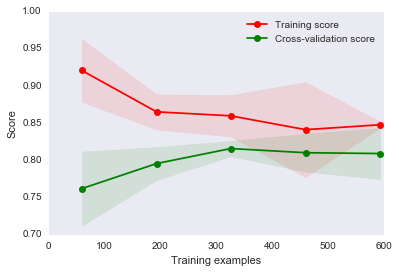

In [12]:
r.plot_learning_curve()